In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
def load_data():
    train = pd.read_csv("/content/drive/MyDrive/DR/train.csv")

    train_dir = os.path.join("/content/drive/MyDrive/DR/train_images")

    train['file_name'] = train['id_code'] + ".png"

    train['diagnosis'] = train['diagnosis'].astype(int)  # Convert diagnosis to integers

    return train

In [4]:
# Load and preprocess data
df = load_data()

In [5]:
# Define image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
# Load and preprocess images
train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='/content/drive/MyDrive/DR/train_images',
    x_col='file_name',
    y_col='diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    subset='training'
)

print(train_generator.filenames)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory='/content/drive/MyDrive/DR/train_images',
    x_col='file_name',
    y_col='diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    subset='validation'
)

Found 2564 validated image filenames.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 458 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  warnings.warn(


['34723fae6475.png', '348598d01e18.png', '34a7dbd3f05c.png', '34acae864963.png', '35362d43e753.png', '356304d15a5c.png', '35777eb7859d.png', '357f02a779d7.png', '3599029efeb3.png', '359bab5d784b.png', '35aa7f5c2ec0.png', '35ac70c0d08f.png', '35beb47fe159.png', '35cd9832fc0a.png', '35d6c4c50072.png', '35df2bc6ae95.png', '36041171f441.png', '360832d84ce0.png', '365f8c01d994.png', '36677b70b1ef.png', '367c7049929c.png', '36865bbc64d6.png', '369229040a34.png', '36a1e3c780a0.png', '36b5b3c9fb32.png', '36e4b704b905.png', '36ec36c301c1.png', '370f575adb23.png', '3730c322d35b.png', '374535e0adb8.png', '3748349334f6.png', '378963f9df22.png', '37c4dfe03aba.png', '37c523296d42.png', '37de05ef12a5.png', '38055d8b9f08.png', '3810040096cb.png', '382752f6694a.png', '38373431d996.png', '384631079d1e.png', '38487e1a5b1f.png', '384db24ebbd7.png', '387138ddf43d.png', '388279491b5d.png', '389552047476.png', '38b9bb961847.png', '38c7153457e2.png', '38e0e28d35d3.png', '38e111cac46f.png', '38f1901f214a.png',

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 458 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  warnings.warn(


In [7]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10
80/80 [==============================] - 749s 9s/step - loss: 0.2239 - accuracy: 0.9269 - val_loss: 1.5053 - val_accuracy: 0.7234
Epoch 2/10
80/80 [==============================] - 747s 9s/step - loss: 0.1514 - accuracy: 0.9522 - val_loss: 1.6208 - val_accuracy: 0.7281
Epoch 3/10
80/80 [==============================] - 758s 9s/step - loss: 0.1176 - accuracy: 0.9700 - val_loss: 1.8930 - val_accuracy: 0.7234
Epoch 4/10
80/80 [==============================] - 759s 9s/step - loss: 0.1185 - accuracy: 0.9704 - val_loss: 1.8986 - val_accuracy: 0.6984
Epoch 5/10
80/80 [==============================] - 762s 10s/step - loss: 0.0977 - accuracy: 0.9767 - val_loss: 1.5369 - val_accuracy: 0.7234
Epoch 6/10
80/80 [==============================] - 759s 9s/step - loss: 0.0734 - accuracy: 0.9830 - val_loss: 1.9256 - val_accuracy: 0.7078
Epoch 7/10
80/80 [==============================] - 763s 10s/step - loss: 0.0550 - accuracy: 0.9893 - val_loss: 2.2453 - val_accuracy: 0.7484
Epoch 8/10


In [11]:
# Save the model
model.save('diabetic_retinopathy_model_1.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


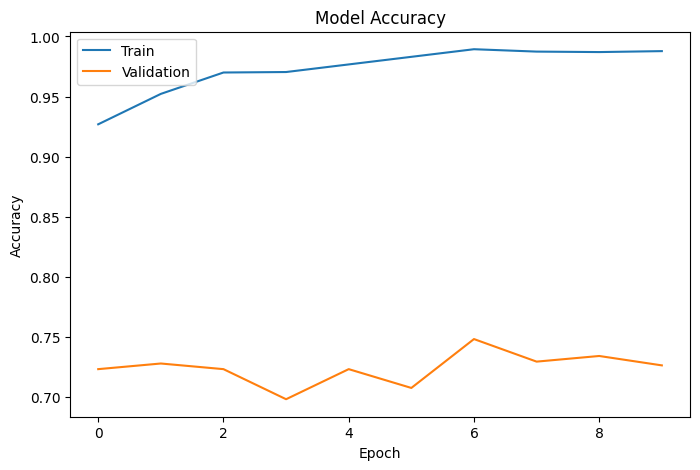

In [14]:
import matplotlib.pyplot as plt

# Plot the training history
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'])  # Change 'accuracy' to the appropriate metric if needed
plt.plot(history.history['val_accuracy'])  # Add validation accuracy if available

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
